## Imports

In [404]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [406]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from diabetes import load,split,scale,display
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

## Load, Split, Scale

In [407]:
X,y = load() # use helper to load data

In [408]:
seed = 12

In [409]:
X_train, X_test, y_train, y_test = split(X,y,seed) # helper to split data

In [410]:
X_train_s, X_test_s = scale(X_train, X_test) # helper to scale data

## Default RandomForestClassifier

In [411]:
rf = RandomForestClassifier()

In [430]:
rf.fit(X_train_s,y_train)

RandomForestClassifier()

In [431]:
y_pred = rf.predict(X_test_s)

In [432]:
default = accuracy_score(y_test, y_pred)
default

0.7857142857142857

In [433]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1
Actual           
0          87  13
1          20  34


## GridSearchCV

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
parameters = {
    "n_estimators":[50,100,150],
    "max_depth":[2,10,50],
    "min_samples_split":[0.01,0.1,0.25],
    "n_jobs":[-1],
    "max_samples": [0.1,0.5,0.8, None]
}

In [175]:
cv = GridSearchCV(rf,parameters,cv=5)

In [176]:
cv.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, 50],
                         'max_samples': [0.1, 0.5, 0.8, None],
                         'min_samples_split': [0.01, 0.1, 0.25],
                         'n_estimators': [50, 100, 150], 'n_jobs': [-1]})

In [242]:
display(cv) # helper to output best parameters and all tested parameters

Best parameters are: {'max_depth': 10, 'max_samples': 0.8, 'min_samples_split': 0.1, 'n_estimators': 50, 'n_jobs': -1}


0.751 + or -0.035 for the {'max_depth': 2, 'max_samples': 0.1, 'min_samples_split': 0.01, 'n_estimators': 50, 'n_jobs': -1}
0.731 + or -0.032 for the {'max_depth': 2, 'max_samples': 0.1, 'min_samples_split': 0.01, 'n_estimators': 100, 'n_jobs': -1}
0.743 + or -0.039 for the {'max_depth': 2, 'max_samples': 0.1, 'min_samples_split': 0.01, 'n_estimators': 150, 'n_jobs': -1}
0.651 + or -0.002 for the {'max_depth': 2, 'max_samples': 0.1, 'min_samples_split': 0.1, 'n_estimators': 50, 'n_jobs': -1}
0.651 + or -0.002 for the {'max_depth': 2, 'max_samples': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100, 'n_jobs': -1}
0.651 + or -0.002 for the {'max_depth': 2, 'max_samples': 0.1, 'min_samples_split': 0.1, 'n_estimators': 150, 'n_jobs': -1}
0.651 + or -0.002 for the {'max_depth': 2, 'max_samples': 0.1, 'min_samples_split': 0.25, 'n_estimators': 50, 'n_jobs': -1}
0.651 + or

## Tuned RandomForestClassifier

In [434]:
rf_tuned = RandomForestClassifier(
    max_depth=10, max_samples=0.8, min_samples_split=0.1, n_estimators=50, n_jobs=-1) # min_samples_leaf=10, max_features=3

In [480]:
rf_tuned.fit(X_train_s, y_train)

RandomForestClassifier(max_depth=10, max_samples=0.8, min_samples_split=0.1,
                       n_estimators=50, n_jobs=-1)

In [481]:
y_pred = rf_tuned.predict(X_test_s)

In [482]:
tuned = accuracy_score(y_test, y_pred)
tuned, default

(0.7727272727272727, 0.7857142857142857)

In [483]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1
Actual           
0          89  11
1          24  30


## Feature Importance

In [484]:
features = pd.DataFrame({'feature':list(X.columns),'importance':rf_tuned.feature_importances_}).sort_values('importance',ascending=False)

In [485]:
features

,feature,importance
1,Glucose,0.419114
5,BMI,0.169517
7,Age,0.140160
0,Pregnancies,0.086179
4,Insulin,0.069384
6,DiabetesPedigreeFunction,0.054655
2,BloodPressure,0.037746
3,SkinThickness,0.023245


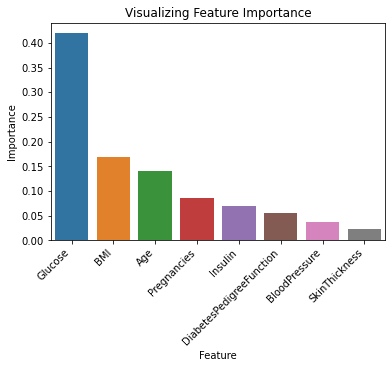

In [486]:
ax = sns.barplot(x = features.feature, y = features.importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Visualizing Feature Importance')
plt.xticks(rotation = 45,ha = 'right')
plt.show()

## Feature Selected RandomForestClassifier

In [487]:
# load data with selected features
X2 = X.drop(['SkinThickness'], axis=1)

# split data
X_train2, X_test2, y_train2, y_test2 = split(X2,y,30) # try seed = 30

# standardize the dataset
scaler2 = StandardScaler()
X_train2_s = scaler2.fit_transform(X_train2)
X_test2_s = scaler2.transform(X_test2)

In [488]:
rf2 = RandomForestClassifier(max_depth=10, max_samples=0.8, min_samples_split=0.1, n_estimators=50, n_jobs=-1)

In [489]:
rf2.fit(X_train2_s,y_train2)

RandomForestClassifier(max_depth=10, max_samples=0.8, min_samples_split=0.1,
                       n_estimators=50, n_jobs=-1)

In [490]:
y_pred2 = rf2.predict(X_test2_s)

In [492]:
selected = accuracy_score(y_test2,y_pred2)
selected, tuned, default

(0.7857142857142857, 0.7727272727272727, 0.7857142857142857)

In [493]:
print(pd.crosstab(y_test2, y_pred2, rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1
Actual           
0          86  14
1          19  35


## First Decision Tree Visualization

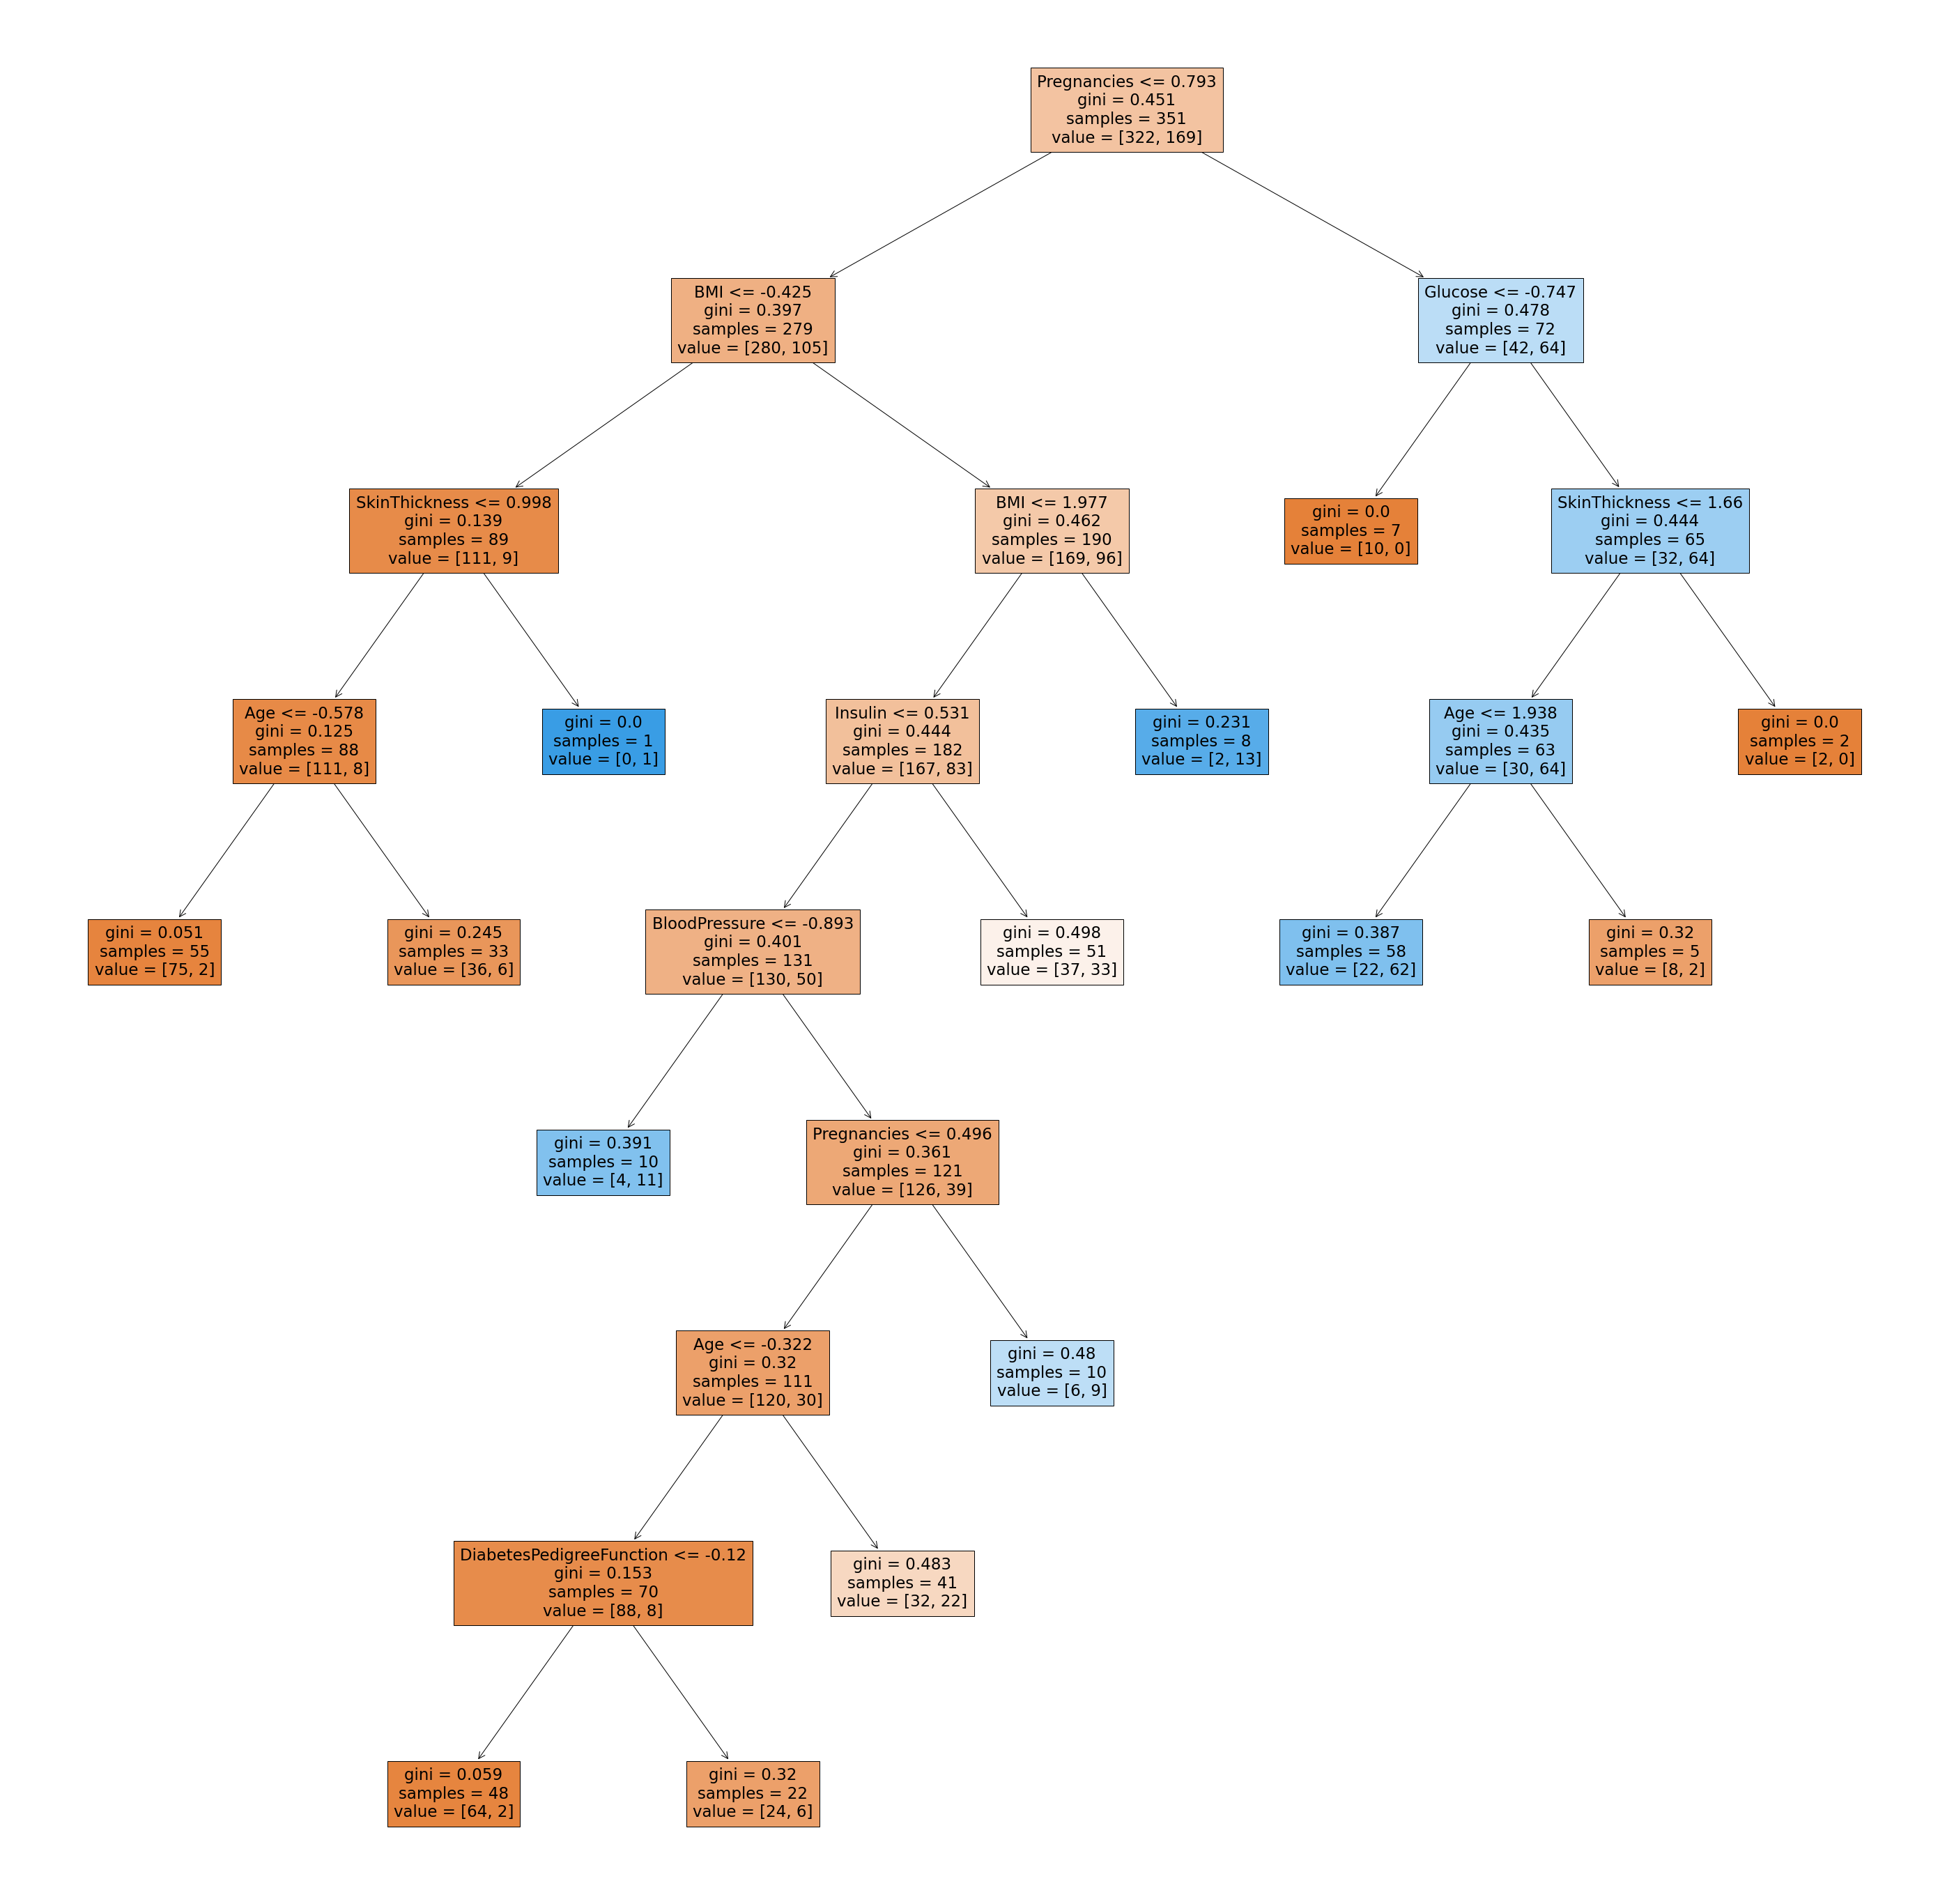

In [494]:
plt.figure(figsize=(50,50))
tree.plot_tree(rf_tuned.estimators_[0], feature_names=X.columns, filled=True)
plt.show()